In [82]:
import os
import pylab as pl
import seaborn
import pandas as pd
import numpy as np
from datetime import datetime as dt
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [83]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [84]:
datestring = '201503'
getCitiBikeCSV(datestring)

file in place, you can continue


In [85]:
trips = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')

In [86]:
trips['date'] = pd.to_datetime(trips['starttime'])
trips.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,669,3/1/2015 0:00,3/1/2015 0:11,164,E 47 St & 2 Ave,40.753231,-73.970325,477,W 41 St & 8 Ave,40.756405,-73.990026,21409,Subscriber,1987.0,1,2015-03-01 00:00:00
1,750,3/1/2015 0:01,3/1/2015 0:14,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,436,Hancock St & Bedford Ave,40.682166,-73.953990,19397,Subscriber,1968.0,1,2015-03-01 00:01:00
2,663,3/1/2015 0:01,3/1/2015 0:12,497,E 17 St & Broadway,40.737050,-73.990093,477,W 41 St & 8 Ave,40.756405,-73.990026,20998,Customer,NaN,0,2015-03-01 00:01:00
3,480,3/1/2015 0:02,3/1/2015 0:10,470,W 20 St & 8 Ave,40.743453,-74.000040,491,E 24 St & Park Ave S,40.740964,-73.986022,21565,Subscriber,1983.0,1,2015-03-01 00:02:00
4,1258,3/1/2015 0:02,3/1/2015 0:23,345,W 13 St & 6 Ave,40.736494,-73.997044,473,Rivington St & Chrystie St,40.721101,-73.991925,14693,Subscriber,1970.0,1,2015-03-01 00:02:00


In [87]:
trips['DayofWeek'] = trips['date'].dt.weekday

In [137]:
trips_sub = trips[trips.usertype == "Subscriber"]
trips_cus = trips[trips.usertype == "Customer"]

In [138]:
monday_tot = np.asarray(trips.groupby('DayofWeek').get_group(0).count().tripduration)
tuesday_tot = np.asarray(trips.groupby('DayofWeek').get_group(1).count().tripduration)
wednesday_tot = np.asarray(trips.groupby('DayofWeek').get_group(2).count().tripduration)
thursday_tot = np.asarray(trips.groupby('DayofWeek').get_group(3).count().tripduration)
friday_tot = np.asarray(trips.groupby('DayofWeek').get_group(4).count().tripduration)
saturday_tot = np.asarray(trips.groupby('DayofWeek').get_group(5).count().tripduration)
sunday_tot = np.asarray(trips.groupby('DayofWeek').get_group(6).count().tripduration)

monday_sub = np.asarray(trips_sub.groupby('DayofWeek').get_group(0).count().tripduration)
tuesday_sub = np.asarray(trips_sub.groupby('DayofWeek').get_group(1).count().tripduration)
wednesday_sub = np.asarray(trips_sub.groupby('DayofWeek').get_group(2).count().tripduration)
thursday_sub = np.asarray(trips_sub.groupby('DayofWeek').get_group(3).count().tripduration)
friday_sub = np.asarray(trips_sub.groupby('DayofWeek').get_group(4).count().tripduration)
saturday_sub = np.asarray(trips_sub.groupby('DayofWeek').get_group(5).count().tripduration)
sunday_sub = np.asarray(trips_sub.groupby('DayofWeek').get_group(6).count().tripduration)

monday_cus = np.asarray(trips_cus.groupby('DayofWeek').get_group(0).count().tripduration)
tuesday_cus = np.asarray(trips_cus.groupby('DayofWeek').get_group(1).count().tripduration)
wednesday_cus = np.asarray(trips_cus.groupby('DayofWeek').get_group(2).count().tripduration)
thursday_cus = np.asarray(trips_cus.groupby('DayofWeek').get_group(3).count().tripduration)
friday_cus = np.asarray(trips_cus.groupby('DayofWeek').get_group(4).count().tripduration)
saturday_cus = np.asarray(trips_cus.groupby('DayofWeek').get_group(5).count().tripduration)
sunday_cus = np.asarray(trips_cus.groupby('DayofWeek').get_group(6).count().tripduration)

In [139]:
weekend_trips_tot = np.asarray([saturday_tot, sunday_tot])
weekend_trips_sub = np.asarray([saturday_sub, sunday_sub])
weekend_trips_cus = np.asarray([saturday_cus, sunday_cus])


weekday_trips_tot = np.asarray([tuesday_tot, wednesday_tot, thursday_tot])
weekday_trips_sub = np.asarray([tuesday_sub, wednesday_sub, thursday_sub])
weekday_trips_cus = np.asarray([tuesday_cus, wednesday_cus, thursday_cus])

In [149]:
print('Results from ANOVA looking at Total Trips:')
print(stats.kruskal(weekend_trips_tot, weekday_trips_tot))
print('Results from ANOVA looking at trips taken by subscribers:')
print(stats.kruskal(weekend_trips_sub, weekday_trips_sub))
print('Results from ANOVA looking at trips taken by one-off customers:')
print(stats.kruskal(weekend_trips_cus, weekday_trips_cus))

Results from ANOVA looking at Total Trips:
KruskalResult(statistic=3.0, pvalue=0.08326451666355042)
Results from ANOVA looking at trips taken by subscribers:
KruskalResult(statistic=3.0, pvalue=0.08326451666355042)
Results from ANOVA looking at trips taken by one-off customers:
KruskalResult(statistic=0.0, pvalue=1.0)


Text(0.5,1,'Distribution of Trips Taken by Day of Week')

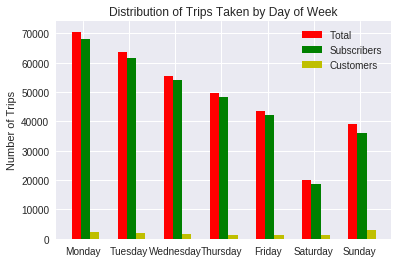

In [143]:
objects = ('Monday', 'Tuesday', "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
y_pos = np.arange(len(objects))
tot_bar = [monday_tot, tuesday_tot, wednesday_tot, thursday_tot, friday_tot, saturday_tot, sunday_tot]
sub_bar = [monday_sub, tuesday_sub, wednesday_sub, thursday_sub, friday_sub, saturday_sub, sunday_sub]
cus_bar = [monday_cus, tuesday_cus, wednesday_cus, thursday_cus, friday_cus, saturday_cus, sunday_cus]

width = .2
 
fig, ax = plt.subplots()

rect1 = ax.bar(y_pos, tot_bar, width, align='center', color = 'r')
rect2 = ax.bar(y_pos + width, sub_bar, width, align='center', color = 'g')
rect3 = ax.bar(y_pos + 2*width, cus_bar, width, align='center', color = 'y')
ax.set_xticks([.75*width, 1 + .75*width, 2 + .75*width, 3 + .75*width, 4 + .75*width, 5 + .75*width, 6 + .75*width])
ax.set_xticklabels(('Monday', 'Tuesday', 'Wednesday', 'Thursday', "Friday", "Saturday", "Sunday"))
ax.set_ylabel('Number of Trips')
ax.legend((rect1[0], rect2[0], rect3[0]), ("Total", "Subscribers", "Customers"))
ax.set_title('Distribution of Trips Taken by Day of Week')

Text(0.5,1,'Average # of Trips Taken per Weekday(Tuesday-Thursday) + Weekday(Saturday-Sunday)')

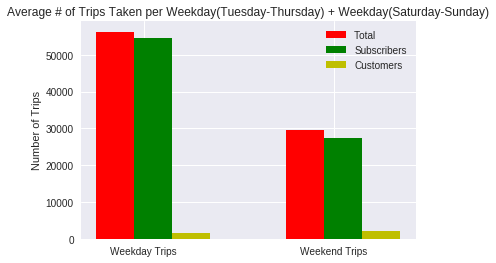

In [144]:
objects = ('Weekday Trips', 'Weekend Trips')
y_pos = np.arange(len(objects))
tot_bar = [weekday_trips_tot.mean(), weekend_trips_tot.mean()]
sub_bar = [weekday_trips_sub.mean(), weekend_trips_sub.mean()]
cus_bar = [weekday_trips_cus.mean(), weekend_trips_cus.mean()]

width = .2
 
fig, ax = plt.subplots()

rect1 = ax.bar(y_pos, tot_bar, width, align='center', color = 'r')
rect2 = ax.bar(y_pos + width, sub_bar, width, align='center', color = 'g')
rect3 = ax.bar(y_pos + 2*width, cus_bar, width, align='center', color = 'y')
ax.set_xticks([.75*width, 1 + .75*width])
ax.set_xticklabels(('Weekday Trips', 'Weekend Trips'))
ax.set_ylabel('Number of Trips')
ax.legend((rect1[0], rect2[0], rect3[0]), ("Total", "Subscribers", "Customers"))
ax.set_title('Average # of Trips Taken per Weekday(Tuesday-Thursday) + Weekday(Saturday-Sunday)')